In [1]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'Data ML prototype (Leasehold).xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Floor Level
0,D'LEEDON,3650000,1399.32,2608,Mar-24,LEEDON HEIGHTS,Resale,130,28077,-,Condominium,1,99 yrs lease commencing from 2010,10,26 to 30
1,POLLEN & BLEU,2180000,1184.04,1841,Feb-24,FARRER DRIVE,Resale,110,19818,-,Condominium,1,99 yrs lease commencing from 2012,10,01 to 05
2,POLLEN & BLEU,2770000,1431.61,1935,Feb-24,FARRER DRIVE,Resale,133,20827,-,Condominium,1,99 yrs lease commencing from 2012,10,01 to 05
3,D'LEEDON,2880000,1399.32,2058,Feb-24,LEEDON HEIGHTS,Resale,130,22154,-,Condominium,1,99 yrs lease commencing from 2010,10,31 to 35
4,DUCHESS CREST,2500000,1367.03,1829,Feb-24,DUCHESS AVENUE,Resale,127,19685,-,Condominium,1,99 yrs lease commencing from 1995,10,01 to 05


In [2]:
from datetime import datetime

# Convert "Sale Date" to datetime format
data['Sale Date'] = pd.to_datetime(data['Sale Date'], format='%b-%y', errors='coerce')

# Assuming the dataset is ordered and the first entry is the earliest, calculate the years from the start
start_date = data['Sale Date'].min()
data['Years Since Start'] = data['Sale Date'].apply(lambda x: (x - start_date).days / 365.25)

# Check the transformation and the new column
data[['Sale Date', 'Years Since Start', 'Transacted Price ($)']].head()


,Sale Date,Years Since Start,Transacted Price ($)
0,2024-03-01,5.002053,3650000
1,2024-02-01,4.922656,2180000
2,2024-02-01,4.922656,2770000
3,2024-02-01,4.922656,2880000
4,2024-02-01,4.922656,2500000


In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for modeling
X = data[['Years Since Start']]
y = data['Transacted Price ($)']

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the price in 25 years
future_year = 25
predicted_price = model.predict([[future_year]])

# Calculate mean, variance, and identify top 5% and bottom 5% values after predicting for a range
future_years = np.arange(6, 31)  # From 20 to 30 years
predicted_prices = model.predict(future_years.reshape(-1, 1))

mean_price = np.mean(predicted_prices)
variance_price = np.var(predicted_prices)
top_5_percent = np.percentile(predicted_prices, 95)
bottom_5_percent = np.percentile(predicted_prices, 5)

predicted_price, mean_price, variance_price, top_5_percent, bottom_5_percent


C:\Users\Depre\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Depre\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([3105329.23129601]),
 2904890.0789288324,
 42635599952.7942,
 3214139.056866759,
 2595641.100990906)

C:\Users\Depre\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


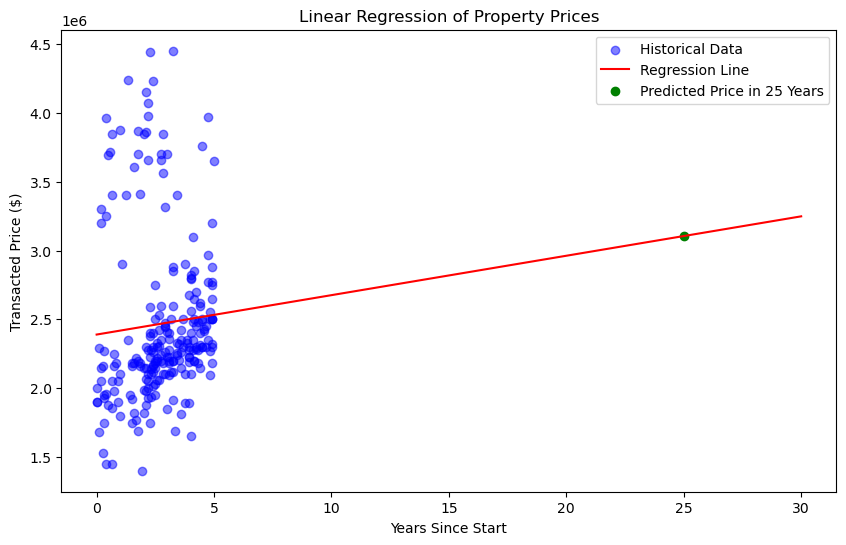

In [4]:
import matplotlib.pyplot as plt

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original data as scatter
ax.scatter(X, y, color='blue', alpha=0.5, label='Historical Data')

# range of years from start till end
years_extended = np.linspace(X.min(), 30, 400).reshape(-1, 1)
predicted_prices_extended = model.predict(years_extended)

# Plot LR Line
ax.plot(years_extended, predicted_prices_extended, color='red', label='Regression Line')

# Highlight Line
ax.scatter([25], [predicted_price], color='green', label='Predicted Price in 25 Years')

# Label
ax.set_title('Linear Regression of Property Prices')
ax.set_xlabel('Years Since Start')
ax.set_ylabel('Transacted Price ($)')
ax.legend()

plt.show()


In [5]:
# Define a function to calculate and display the statistical metrics for the current data
def display_current_data_stats(dataframe):
    # Ensure the 'Transacted Price ($)' is in numeric format
    dataframe['Transacted Price ($)'] = pd.to_numeric(dataframe['Transacted Price ($)'], errors='coerce')
    
    # Drop any rows with NaN or infinite values which may arise from conversion errors or missing data
    clean_dataframe = dataframe.dropna(subset=['Transacted Price ($)'])

    # Calculate the required statistical metrics
    mean_current_price = clean_dataframe['Transacted Price ($)'].mean()
    variance_current_price = clean_dataframe['Transacted Price ($)'].var(ddof=1)  # Using sample variance
    top_5_percent_current = clean_dataframe['Transacted Price ($)'].quantile(0.95)
    bottom_5_percent_current = clean_dataframe['Transacted Price ($)'].quantile(0.05)

    # Display the calculated statistics
    print(f"Mean Transacted Price: ${mean_current_price:,.2f}")
    print(f"Variance in Transacted Prices: ${variance_current_price:,.2f}")
    print(f"Top 5% Transacted Price: ${top_5_percent_current:,.2f}")
    print(f"Bottom 5% Transacted Price: ${bottom_5_percent_current:,.2f}")
    

# Call the function with the current data
display_current_data_stats(data)


Mean Transacted Price: $2,468,625.28
Variance in Transacted Prices: $381,871,037,441.93
Top 5% Transacted Price: $3,855,000.00
Bottom 5% Transacted Price: $1,784,000.00
